In [1]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# Архитектура сети
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
print(network.summary())

#Визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(network, to_file='Структура сети 4сл 512.png', show_shapes=True, show_layer_names=True)

# Настроить функцию потерь, оптимизатор и точность
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# Подготовка исходных данных
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

# Кодирование метрики категорий
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Обучение модели
history=network.fit(train_images, train_labels, epochs=20, batch_size=128)
history_dict=history.history
# Проверка работы модели
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2347 - accuracy: 0.9277
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.9734
Epoch 3/20
469/469 [=======================

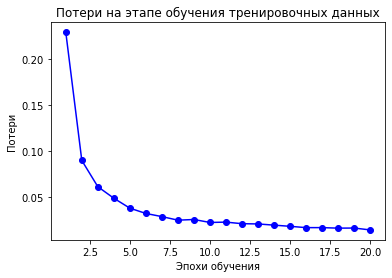

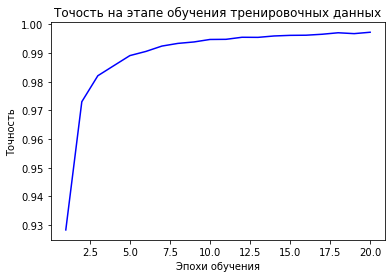

In [2]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
acc=history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo-')
plt.title('Потери на этапе обучения тренировочных данных')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.savefig('Потери на этапе обучения тренировочных данных 20 эпох.png')
plt.show()

plt.plot(epochs, acc, 'b') 
plt.title('Точость на этапе обучения тренировочных данных')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.savefig('Точность на этапе обучения тренировочных данных 20 эпох.png')
plt.show()

In [1]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# Архитектура сети
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
# Настроить функцию потерь, оптимизатор и точность
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# Подготовка исходных данных
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255


# Кодирование метрики категорий
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Создание проверочного набора
x_val = train_images[-10000:]
y_val = train_labels[-10000:]
x_train = train_images[:-10000]
y_train = train_labels[:-10000]

# Обучение модели
history=network.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

history_dict=history.history
# Проверка работы модели
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.9174 - val_loss: 0.1275 - val_accuracy: 0.9628
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9712 - val_loss: 0.1043 - val_accuracy: 0.9687
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.1179 - val_accuracy: 0.9715
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9859 - val_loss: 0.1317 - val_accuracy: 0.9738
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0395 - accuracy: 0.9888 - val_loss: 0.0903 - val_accuracy: 0.9800
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9912 - val_loss: 0.1348 - val_accuracy: 0.9752
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9920 - val_loss: 0.1311 - val_accuracy: 0.9786
Epoch 

In [8]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

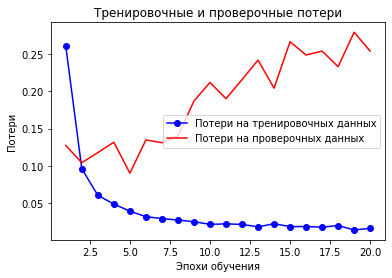

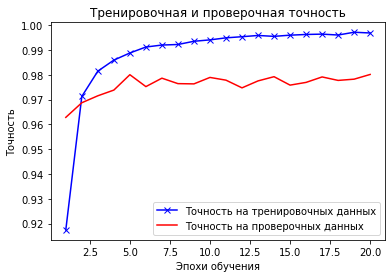

In [2]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Потери на тренировочных данных')
plt.plot(epochs, val_loss_values, 'r-', label='Потери на проверочных данных') 
plt.title('Тренировочные и проверочные потери')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend()
plt.savefig('Потери на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

plt.plot(epochs, acc, 'bx-', label='Точность на тренировочных данных')
plt.plot(epochs, val_acc, 'r-', label='Точность на проверочных данных') 
plt.title('Тренировочная и проверочная точность')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.savefig('Точность на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

In [1]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# Архитектура сети
from keras import models
from keras import layers

network_1=models.Sequential()
network_1.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network_1.add(layers.Dense(10, activation='softmax'))

print(network_1.summary())

#Визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(network_1, to_file='Структура сети 2сл 512.png', show_shapes=True, show_layer_names=True)

# Настроить функцию потерь, оптимизатор и точность
network_1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# Подготовка исходных данных
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255


# Кодирование метрики категорий
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Создание проверочного набора
x_val = train_images[-10000:]
y_val = train_labels[-10000:]
x_train = train_images[:-10000]
y_train = train_labels[:-10000]

# Обучение модели
history=network_1.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

history_dict=history.history
# Проверка работы модели
test_loss, test_acc=network_1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2787 - accuracy: 0.9191 - val_loss: 0.1433 - val_accuracy: 0.9589
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9662 - val_loss: 0.1132 - val_accuracy: 0.9673
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9775 - val_loss: 0.0984 - val_accuracy: 0.9716
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0549 

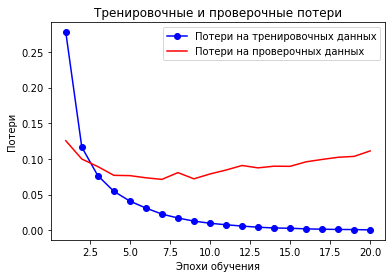

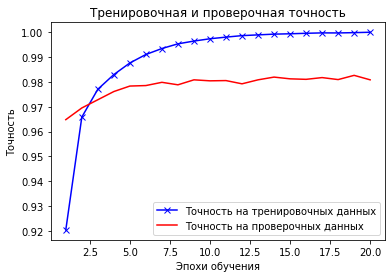

In [2]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Потери на тренировочных данных')
plt.plot(epochs, val_loss_values, 'r-', label='Потери на проверочных данных') 
plt.title('Тренировочные и проверочные потери')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend()
plt.savefig('Потери на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

plt.plot(epochs, acc, 'bx-', label='Точность на тренировочных данных')
plt.plot(epochs, val_acc, 'r-', label='Точность на проверочных данных') 
plt.title('Тренировочная и проверочная точность')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.savefig('Точность на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

In [2]:
# Архитектура сети

network=models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

print(network.summary())

#Визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(network, to_file='Структура сети 2сл 256.png', show_shapes=True, show_layer_names=True)

# Настроить функцию потерь, оптимизатор и точность
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Обучение модели
history_256=network.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

history_dict_256=history_256.history
# Проверка работы модели
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.9116 - val_loss: 0.1694 - val_accuracy: 0.9511
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1410 - accuracy: 0.9591 - val_loss: 0.1087 - val_accuracy: 0.9695
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9718 - val_loss: 0.0932 - val_accuracy: 0.9717
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.071

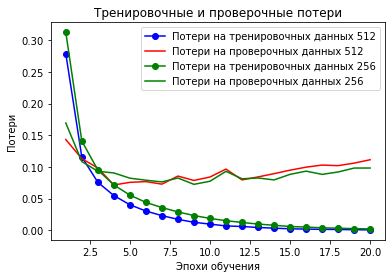

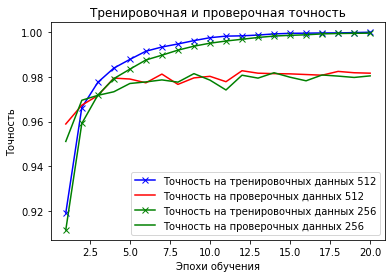

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

history_dict_256 = history_256.history
loss_values_256 = history_dict_256['loss']
val_loss_values_256 = history_dict_256['val_loss']
acc_256=history_dict_256['accuracy']
val_acc_256=history_dict_256['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Потери на тренировочных данных 512')
plt.plot(epochs, val_loss_values, 'r-', label='Потери на проверочных данных 512')
plt.plot(epochs, loss_values_256, 'go-', label='Потери на тренировочных данных 256')
plt.plot(epochs, val_loss_values_256, 'g-', label='Потери на проверочных данных 256')
plt.title('Тренировочные и проверочные потери')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend()
plt.savefig('Потери на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

plt.plot(epochs, acc, 'bx-', label='Точность на тренировочных данных 512')
plt.plot(epochs, val_acc, 'r-', label='Точность на проверочных данных 512')
plt.plot(epochs, acc_256, 'gx-', label='Точность на тренировочных данных 256')
plt.plot(epochs, val_acc_256, 'g-', label='Точность на проверочных данных 256') 
plt.title('Тренировочная и проверочная точность')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.savefig('Точность на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

In [4]:
history_dict_265.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
# Архитектура сети

network_1024=models.Sequential()
network_1024.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
network_1024.add(layers.Dense(10, activation='softmax'))

print(network_1024.summary())

#Визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(network_1024, to_file='Структура сети 2сл 1024.png', show_shapes=True, show_layer_names=True)

# Настроить функцию потерь, оптимизатор и точность
network_1024.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Обучение модели
history_1024=network_1024.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

history_dict_1024=history_1024.history
# Проверка работы модели
test_loss, test_acc=network_1024.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2548 - accuracy: 0.9241 - val_loss: 0.1171 - val_accuracy: 0.9656
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9713 - val_loss: 0.0870 - val_accuracy: 0.9744
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9816 - val_loss: 0.0830 - val_accuracy: 0.9755
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.043

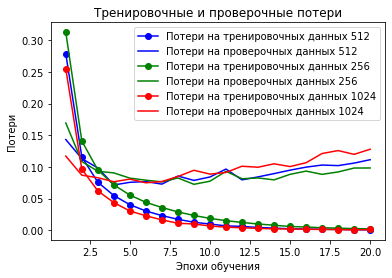

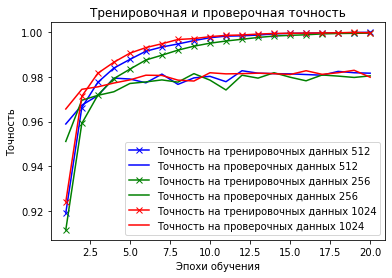

In [12]:
history_dict_1024 = history_1024.history
loss_values_1024 = history_dict_1024['loss']
val_loss_values_1024 = history_dict_1024['val_loss']
acc_1024=history_dict_1024['accuracy']
val_acc_1024=history_dict_1024['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Потери на тренировочных данных 512')
plt.plot(epochs, val_loss_values, 'b-', label='Потери на проверочных данных 512')
plt.plot(epochs, loss_values_256, 'go-', label='Потери на тренировочных данных 256')
plt.plot(epochs, val_loss_values_256, 'g-', label='Потери на проверочных данных 256')
plt.plot(epochs, loss_values_1024, 'ro-', label='Потери на тренировочных данных 1024')
plt.plot(epochs, val_loss_values_1024, 'r-', label='Потери на проверочных данных 1024')
plt.title('Тренировочные и проверочные потери')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend()
plt.savefig('Потери на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

plt.plot(epochs, acc, 'bx-', label='Точность на тренировочных данных 512')
plt.plot(epochs, val_acc, 'b-', label='Точность на проверочных данных 512')
plt.plot(epochs, acc_256, 'gx-', label='Точность на тренировочных данных 256')
plt.plot(epochs, val_acc_256, 'g-', label='Точность на проверочных данных 256')
plt.plot(epochs, acc_1024, 'rx-', label='Точность на тренировочных данных 1024')
plt.plot(epochs, val_acc_1024, 'r-', label='Точность на проверочных данных 1024') 
plt.title('Тренировочная и проверочная точность')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.savefig('Точность на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

In [1]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# Архитектура сети
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# Настроить функцию потерь, оптимизатор и точность
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# Подготовка исходных данных
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255


# Кодирование метрики категорий
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Создание проверочного набора
x_val = train_images[-10000:]
y_val = train_labels[-10000:]
x_train = train_images[:-10000]
y_train = train_labels[:-10000]

# Обучение модели
history=network.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

history_dict=history.history
# Проверка работы модели
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.9205 - val_loss: 0.1324 - val_accuracy: 0.9602
Epoch 2/20
391/391 [==============================] - 1s 2ms/step - loss: 0.1144 - accuracy: 0.9661 - val_loss: 0.0995 - val_accuracy: 0.9715
Epoch 3/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9775 - val_loss: 0.0861 - val_accuracy: 0.9742
Epoch 4/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0786 - val_accuracy: 0.9769
Epoch 5/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0770 - val_accuracy: 0.9774
Epoch 6/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0310 - accuracy: 0.9911 - val_loss: 0.0777 - val_accuracy: 0.9786
Epoch 7/20
391/391 [==============================] - 1s 2ms/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.0884 - val_accuracy: 0.9753
Epoch 

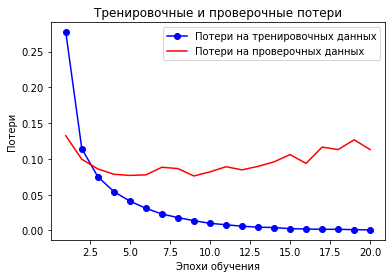

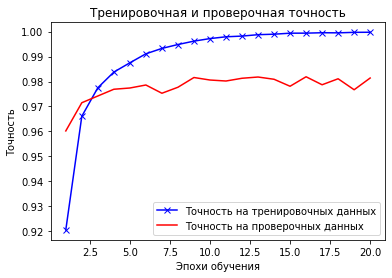

In [2]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Потери на тренировочных данных')
plt.plot(epochs, val_loss_values, 'r-', label='Потери на проверочных данных') 
plt.title('Тренировочные и проверочные потери')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend()
plt.savefig('Потери на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

plt.plot(epochs, acc, 'bx-', label='Точность на тренировочных данных')
plt.plot(epochs, val_acc, 'r-', label='Точность на проверочных данных') 
plt.title('Тренировочная и проверочная точность')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.savefig('Точность на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

In [3]:
# Архитектура сети

network_b256=models.Sequential()
network_b256.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network_b256.add(layers.Dense(10, activation='softmax'))
# Настроить функцию потерь, оптимизатор и точность
network_b256.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Обучение модели
history_b256=network_b256.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_val, y_val))

history_dict_b256=history_b256.history
# Проверка работы модели
test_loss, test_acc=network_b256.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/20
196/196 [==============================] - 1s 3ms/step - loss: 0.3449 - accuracy: 0.9005 - val_loss: 0.1883 - val_accuracy: 0.9475
Epoch 2/20
196/196 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9572 - val_loss: 0.1355 - val_accuracy: 0.9588
Epoch 3/20
196/196 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9720 - val_loss: 0.0901 - val_accuracy: 0.9748
Epoch 4/20
196/196 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9797 - val_loss: 0.0909 - val_accuracy: 0.9729
Epoch 5/20
196/196 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9844 - val_loss: 0.1045 - val_accuracy: 0.9677
Epoch 6/20
196/196 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9880 - val_loss: 0.0805 - val_accuracy: 0.9766
Epoch 7/20
196/196 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9909 - val_loss: 0.0759 - val_accuracy: 0.9777
Epoch 

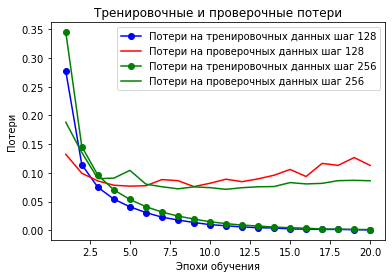

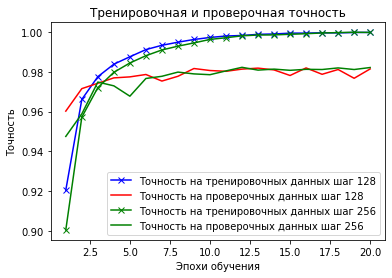

In [5]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

history_dict_b256 = history_b256.history
loss_values_b256 = history_dict_b256['loss']
val_loss_values_b256 = history_dict_b256['val_loss']
acc_b256=history_dict_b256['accuracy']
val_acc_b256=history_dict_b256['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Потери на тренировочных данных шаг 128')
plt.plot(epochs, val_loss_values, 'r-', label='Потери на проверочных данных шаг 128')
plt.plot(epochs, loss_values_b256, 'go-', label='Потери на тренировочных данных шаг 256')
plt.plot(epochs, val_loss_values_b256, 'g-', label='Потери на проверочных данных шаг 256')
plt.title('Тренировочные и проверочные потери')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend()
plt.savefig('Потери на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

plt.plot(epochs, acc, 'bx-', label='Точность на тренировочных данных шаг 128')
plt.plot(epochs, val_acc, 'r-', label='Точность на проверочных данных шаг 128')
plt.plot(epochs, acc_b256, 'gx-', label='Точность на тренировочных данных шаг 256')
plt.plot(epochs, val_acc_b256, 'g-', label='Точность на проверочных данных шаг 256') 
plt.title('Тренировочная и проверочная точность')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.savefig('Точность на этапе обучения тренировочных и проверочных данных 20 эпох.png')
plt.show()

In [1]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# Архитектура сети
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# Настроить функцию потерь, оптимизатор и точность
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# Подготовка исходных данных
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255


# Кодирование метрики категорий
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Создание проверочного набора
x_val = train_images[-10000:]
y_val = train_labels[-10000:]
x_train = train_images[:-10000]
y_train = train_labels[:-10000]

# Обучение модели
history=network.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=256,
    validation_data=(x_val, y_val))

history_dict=history.history
# Проверка работы модели
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/8
196/196 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.9027 - val_loss: 0.1966 - val_accuracy: 0.9428
Epoch 2/8
196/196 [==============================] - 1s 3ms/step - loss: 0.1457 - accuracy: 0.9574 - val_loss: 0.1348 - val_accuracy: 0.9612
Epoch 3/8
196/196 [==============================] - 1s 3ms/step - loss: 0.0964 - accuracy: 0.9721 - val_loss: 0.1070 - val_accuracy: 0.9696
Epoch 4/8
196/196 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9798 - val_loss: 0.0879 - val_accuracy: 0.9739
Epoch 5/8
196/196 [==============================] - 1s 3ms/step - loss: 0.0527 - accuracy: 0.9847 - val_loss: 0.0776 - val_accuracy: 0.9768
Epoch 6/8
196/196 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9885 - val_loss: 0.0797 - val_accuracy: 0.9774
Epoch 7/8
196/196 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9912 - val_loss: 0.0792 - val_accuracy: 0.9779
Epoch 8/8
313

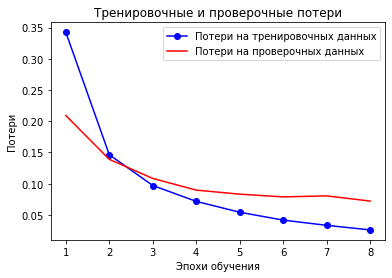

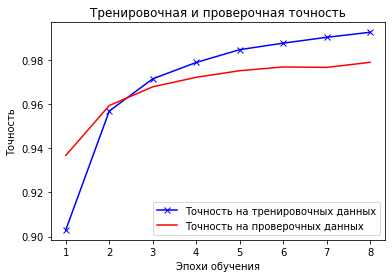

In [2]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo-', label='Потери на тренировочных данных')
plt.plot(epochs, val_loss_values, 'r-', label='Потери на проверочных данных') 
plt.title('Тренировочные и проверочные потери')
plt.xlabel('Эпохи обучения')
plt.ylabel('Потери')
plt.legend()
plt.savefig('Потери на этапе обучения тренировочных и проверочных данных 8 эпох.png')
plt.show()

plt.plot(epochs, acc, 'bx-', label='Точность на тренировочных данных')
plt.plot(epochs, val_acc, 'r-', label='Точность на проверочных данных') 
plt.title('Тренировочная и проверочная точность')
plt.xlabel('Эпохи обучения')
plt.ylabel('Точность')
plt.legend()
plt.savefig('Точность на этапе обучения тренировочных и проверочных данных 8 эпох.png')
plt.show()

In [5]:
predictions=network.predict_classes(test_images[0:6])
print(predictions)

[7 2 1 0 4 1]


7


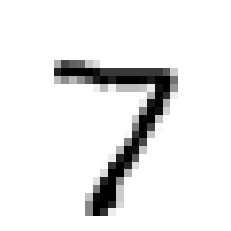

2


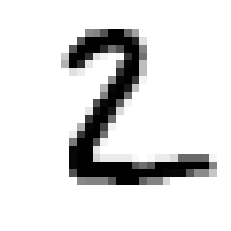

1


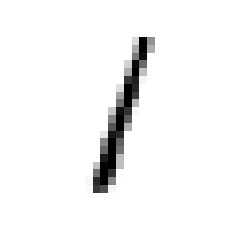

0


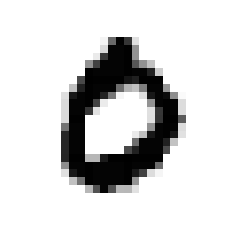

4


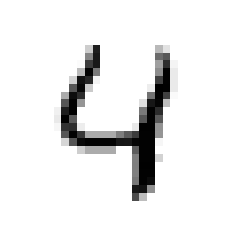

1


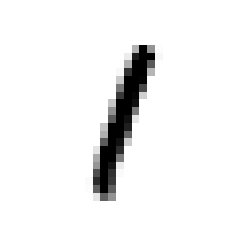

In [7]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
import matplotlib.pyplot as plt
for i in range(6):
    print(test_labels[i])
    rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
    plt.rcParams.update(rc)
    digit = test_images[i]
    
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.savefig('Предсказание'+str(i)+'.png')
    plt.show()

In [8]:
from keras.models import load_model

network.save('End_neural_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [ ]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
# Подготовка исходных данных
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

# Кодирование метрики категорий
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Создание проверочного набора
x_val = train_images[-10000:]
y_val = train_labels[-10000:]
x_train = train_images[:-10000]
y_train = train_labels[:-10000]

# Архитектура сети
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# Настроить функцию потерь, оптимизатор и точность
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Обучение модели
history=network.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=256,
    validation_data=(x_val, y_val))

history_dict=history.history
# Проверка работы модели
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


In [1]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# Архитектура сети
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# Настроить функцию потерь, оптимизатор и точность
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# Подготовка исходных данных
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255


# Кодирование метрики категорий
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

# Создание проверочного набора
x_val = train_images[-10000:]
y_val = train_labels[-10000:]
x_train = train_images[:-10000]
y_train = train_labels[:-10000]

# Обучение модели
history=network.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=128,
    validation_data=(x_val, y_val))

history_dict=history.history
# Проверка работы модели
results=network.evaluate(test_images, test_labels,batch_size=128)
print(results)

Epoch 1/8
391/391 [==============================] - 1s 3ms/step - loss: 0.2784 - accuracy: 0.9200 - val_loss: 0.1535 - val_accuracy: 0.9548
Epoch 2/8
391/391 [==============================] - 1s 3ms/step - loss: 0.1139 - accuracy: 0.9667 - val_loss: 0.0989 - val_accuracy: 0.9716
Epoch 3/8
391/391 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.9776 - val_loss: 0.0875 - val_accuracy: 0.9735
Epoch 4/8
391/391 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9842 - val_loss: 0.0752 - val_accuracy: 0.9759
Epoch 5/8
391/391 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0780 - val_accuracy: 0.9775
Epoch 6/8
391/391 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.0736 - val_accuracy: 0.9787
Epoch 7/8
391/391 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0759 - val_accuracy: 0.9796
Epoch 8/8
79/